Lab02-3
======

## 회귀 분석 연습문제
이번 실습 수업에 배운 회귀 분석 방법을 사용하여 Boston Housing, 보스턴 주택 가격 데이터를 회귀 분석 해보겠습니다.<br>
이전 챕터의 예제 코드를 기반으로 회귀분석을 진행하시면 됩니다.<br>
주택 가격을 Target으로 하여 이에 영향을 미치는 독립변수를 찾아 설명력이 높은 회귀식을 추정해 보세요.

In [1]:
from os.path import join
import numpy as np

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import pandas as pd
from pandas.plotting import scatter_matrix

## 1. 데이터 살펴보기

이번 실습에 사용할 데이터는보스턴 시의 주택 가격에 대한 데이터입니다.

주택의 여러가지 요건들과 주택의 가격 정보가 포함되어 있는 데이터 셋을 분석하여, 주택의 가격에 영향을 미치는 요소를 분석해보세요.

### Feature Description

1. CRIM : 자치시(town) 별 1인당 범죄율
2. ZN : 25,000 평방피트를 초과하는 거주지역의 비율
3. INDUS : 비소매상업지역 면적 비율

5. NOX : 일산화질소 농도
6. RM : 주택 1가구당 평균 방의 개수
7. AGE : 1940년 이전에 건축된 소유주택의 비율
8. DIS : 5개의 보스턴 직업센터까지의 접근성 지수
9. RAD : 방사형 도로까지의 접근성 지수
10. TAX : 10,000 달러 당 재산세율
11. PTRATIO : 자치시(town)별 학생/교사 비율
12. B : 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율 
13. LSTAT : 모집단의 하위계층의 비율(%)

14. MEDV : 본인 소유의 주택가격(중앙값) (단위: $1,000)

15. CAT.MEDV : if MEDV > 30, CAT.MEDV = 1 else, 0

데이터를 살펴보기 쉽게 csv 파일을 pandas DataFrame으로 읽습니다.

In [2]:
df = pd.read_csv(join('data', 'BostonHousing.csv'))

DataFrame.head() 함수로 처음 5개의 데이터를 살펴볼 수 있습니다.

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


## 2. 간단한 전처리

In [4]:
for dim in df.columns:
        df[dim] -= np.min(df[dim])
        df[dim] /= np.max(df[dim])

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222,0.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889,0.0
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000,1.0
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111,1.0
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333,1.0


In [6]:
df.shape

(506, 15)

In [7]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409,0.389618,0.166008
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049,0.204380,0.372456
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040,0.267222,0.000000
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728,0.360000,0.000000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,0.444444,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3. 회귀 분석해보기
최적의 모델 파라미터를 추정해보세요.

In [9]:
dfx = df.iloc[:,:-2]
dfy = df.iloc[:,-2]

# Stepwise Regression

In [10]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


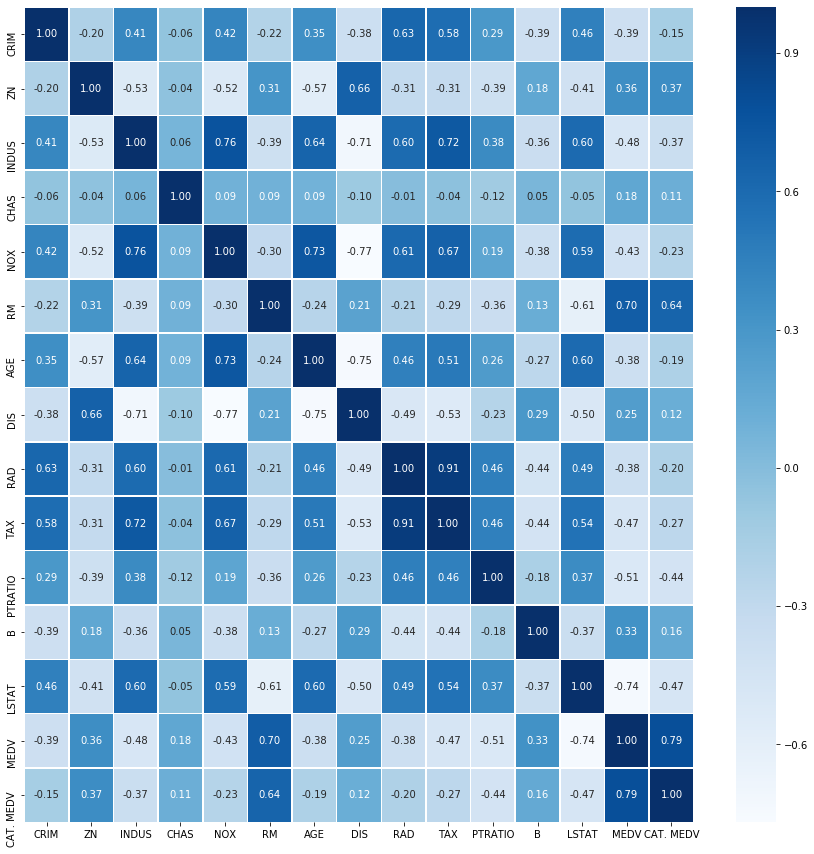

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(),
            annot=True, # 각 셀의 값 표시 여부 
            fmt ='.2f', # 각 셀에 값 표시할 경우 데이터 형식
            linewidths=.5, cmap='Blues')
plt.show()

In [12]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in= 0.15, 
                       threshold_out = 0.1, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        print('\nforward step')
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            lm = linear_model.LinearRegression()
            included_X =  pd.DataFrame(X[included+[new_column]])
            lm.fit(included_X,y)
            params = np.append(lm.intercept_,lm.coef_)
            predictions = lm.predict(included_X)
            
            newX = pd.DataFrame({"Constant":np.ones(len(included_X))}).join(pd.DataFrame(included_X))

            MSE = (sum((y.values-predictions)**2))/(len(newX)-len(newX.columns))
         
            var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
            

            sd_b = np.sqrt(var_b)
            ts_b = params/ sd_b
            p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

            new_pval[new_column] = p_values[-1]

        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            print('best_feature: {}' .format(best_feature))
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        print(included)
        
        # backward step
        print('\nbackward step')
        lm = linear_model.LinearRegression()
        included_X = X[included]
        lm.fit(included_X,y)
        params = np.append(lm.intercept_,lm.coef_)

        predictions = lm.predict(included_X)
        newX = pd.DataFrame({"Constant":np.ones(len(included_X))}).join(pd.DataFrame(included_X))
        MSE = (sum((y.values-predictions)**2))/(len(newX)-len(newX.columns))
        var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
        sd_b = np.sqrt(var_b)
        ts_b = params/ sd_b

        p_values = 2*(1-stats.t.cdf(np.abs(ts_b),(len(newX)-1)))

        # use all coefs except intercept
        pvalues = p_values[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            print('worst_feature: {}' .format(worst_feature))
            included.remove(included[worst_feature])
            print('included: {}' .format(included))
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [13]:
result = stepwise_selection(dfx, dfy)

print('resulting features:')
print(result)

newlabel = result


forward step
best_feature: PTRATIO
Add  PTRATIO                        with p-value 0.0
['PTRATIO']

backward step

forward step
best_feature: INDUS
Add  INDUS                          with p-value 0.0
['PTRATIO', 'INDUS']

backward step

forward step
best_feature: RM
Add  RM                             with p-value 0.0
['PTRATIO', 'INDUS', 'RM']

backward step

forward step
best_feature: LSTAT
Add  LSTAT                          with p-value 0.0
['PTRATIO', 'INDUS', 'RM', 'LSTAT']

backward step
worst_feature: 1
included: ['PTRATIO', 'RM', 'LSTAT']
Drop                              1 with p-value 0.862268

forward step
best_feature: DIS
Add  DIS                            with p-value 1.66599e-05
['PTRATIO', 'RM', 'LSTAT', 'DIS']

backward step

forward step
best_feature: NOX
Add  NOX                            with p-value 5.46337e-08
['PTRATIO', 'RM', 'LSTAT', 'DIS', 'NOX']

backward step

forward step
best_feature: CHAS
Add  CHAS                           with p-value 0.000265155


In [14]:
newlabel

['PTRATIO',
 'RM',
 'LSTAT',
 'DIS',
 'NOX',
 'CHAS',
 'B',
 'ZN',
 'CRIM',
 'RAD',
 'TAX']

In [15]:
dfx_multi = df[newlabel]
dfy_multi = df[['MEDV']]

# 선형회귀 추정기 생성
lr = linear_model.LinearRegression() 

# input 대해 선형 회귀(모델 파라미터 추정)
lr.fit(dfx_multi.values.tolist(), dfy_multi.values.tolist())

# 회귀식으로 데이터의 결과 추정
dfy_y_pred_multi = lr.predict(dfx_multi.values.tolist())

# R2 scroe
R2 = r2_score(dfy_multi.values.tolist(), dfy_y_pred_multi)
print('R2 score: %.2f' % R2)

# adj R2 score
n = len(dfx_multi)
p = len(newlabel)

Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
print('Adj R2 score: %.2f' % Adj_r2)

R2 score: 0.74
Adj R2 score: 0.73


In [16]:
# 모델 파라미터 출력
print('Model parameters: \n')
rgstr = ''
b = []
for i in range(len(lr.coef_[0])):
    b.append(lr.coef_[0,i])
    print("b%d" %(len(lr.coef_[0])-i),": ", "%f" %lr.coef_[0,i])
    rgstr = ' + '+repr(lr.coef_[0,i]) + '*x'+repr(len(lr.coef_[0])-i) + rgstr

print('b0:', lr.intercept_[0])
print()
rgstr = repr(lr.intercept_[0]) + rgstr
print('y = ', rgstr)

Model parameters: 

b11 :  -0.197718
b10 :  0.440899
b9 :  -0.420830
b8 :  -0.364782
b7 :  -0.187661
b6 :  0.060416
b5 :  0.081879
b4 :  0.101878
b3 :  -0.214345
b2 :  0.153133
b1 :  -0.137148
b0: 0.48381821367387046

y =  0.48381821367387046 + -0.13714795769096363*x1 + 0.15313320965704796*x2 + -0.21434494053877695*x3 + 0.10187762043361498*x4 + 0.08187918265953051*x5 + 0.06041591784077964*x6 + -0.18766105303774377*x7 + -0.36478219243081283*x8 + -0.420829717256216*x9 + 0.4408986659225251*x10 + -0.19771846579805283*x11


In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(dfy_multi.values.tolist(),dfy_y_pred_multi)

0.01081477963444553

In [18]:
# # 모델 파라미터 출력
# print('Model parameters: \n')

# rgstr = ''
# for i in range(len(lr.coef_[0])):
#     print("b%d" %(len(lr.coef_[0])-i),": ", "%f" %lr.coef_[0,i])
#     rgstr = ' + '+repr(lr.coef_[0,i]) + '*x'+repr(len(lr.coef_[0])-i) + rgstr

# print('b0:', lr.intercept_[0])
# print()
# rgstr = repr(lr.intercept_[0]) + rgstr
# print('y = ', rgstr)